<a href="https://colab.research.google.com/github/Logesh7-R/DATA_SCIENCE_AI_DEEP_LEARNING/blob/main/project_6_heart_disease_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [168]:

df = pd.read_csv("heart.csv")
df.sample(5)
df.shape

(918, 12)

In [118]:
# Initialize LabelEncoder for each categorical column
enc_chest_pain = LabelEncoder()
enc_resting_ecg = LabelEncoder()
enc_exercise_angina = LabelEncoder()
enc_st_slope = LabelEncoder()
enc_sex = LabelEncoder()

# Fit and transform each categorical column
df['ChestPainType'] = enc_chest_pain.fit_transform(df['ChestPainType'])
df['RestingECG'] = enc_resting_ecg.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = enc_exercise_angina.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = enc_st_slope.fit_transform(df['ST_Slope'])
df['Sex'] = enc_sex.fit_transform(df['Sex'])

# Define dictionaries to map encoded values to labels
chest_pain_mapping = dict(zip(enc_chest_pain.classes_, enc_chest_pain.transform(enc_chest_pain.classes_)))
resting_ecg_mapping = dict(zip(enc_resting_ecg.classes_, enc_resting_ecg.transform(enc_resting_ecg.classes_)))
exercise_angina_mapping = dict(zip(enc_exercise_angina.classes_, enc_exercise_angina.transform(enc_exercise_angina.classes_)))
st_slope_mapping = dict(zip(enc_st_slope.classes_, enc_st_slope.transform(enc_st_slope.classes_)))
sex_mapping = dict(zip(enc_sex.classes_, enc_sex.transform(enc_sex.classes_)))

# Print mappings
print("Chest Pain Type Mapping:", chest_pain_mapping)
print("Resting ECG Mapping:", resting_ecg_mapping)
print("Exercise Angina Mapping:", exercise_angina_mapping)
print("ST Slope Mapping:", st_slope_mapping)
print("Sex Mapping:", sex_mapping)


Chest Pain Type Mapping: {'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3}
Resting ECG Mapping: {'LVH': 0, 'Normal': 1, 'ST': 2}
Exercise Angina Mapping: {'N': 0, 'Y': 1}
ST Slope Mapping: {'Down': 0, 'Flat': 1, 'Up': 2}
Sex Mapping: {'F': 0, 'M': 1}


In [55]:
'''1.age
2.sex
3.chest pain type (4 values)
4.resting blood pressure
5.serum cholestoral in mg/dl
6.fasting blood sugar > 120 mg/dl
7.resting electrocardiographic results (values 0,1,2)
8.maximum heart rate achieved
9.exercise induced angina
10.oldpeak = ST depression induced by exercise relative to rest
'''
'''
1.Age: Age is the most important risk factor in developing cardiovascular or heart diseases,
 with approximately a tripling of risk with each decade of life. Coronary fatty streaks can begin to form in adolescence.
 It is estimated that 82 percent of people who die of coronary heart disease are 65 and older.
 Simultaneously, the risk of stroke doubles every decade after age 55.

2.Sex: Men are at greater risk of heart disease than pre-menopausal women.
Once past menopause, it has been argued that a woman’s risk is similar to a man’s although more recent data from the WHO and UN disputes this.
 If a female has diabetes, she is more likely to develop heart disease than a male with diabetes.

3.Angina (Chest Pain): Angina is chest pain or discomfort caused when your heart muscle doesn’t get enough oxygen-rich blood.
 It may feel like pressure or squeezing in your chest. The discomfort also can occur in your shoulders, arms, neck, jaw, or back.
 Angina pain may even feel like indigestion.

4.Resting Blood Pressure: Over time, high blood pressure can damage arteries that feed your heart.
High blood pressure that occurs with other conditions, such as obesity, high cholesterol or diabetes, increases your risk even more.

5.Serum Cholesterol: A high level of low-density lipoprotein (LDL) cholesterol (the “bad” cholesterol) is most likely to narrow arteries.
A high level of triglycerides, a type of blood fat related to your diet, also ups your risk of a heart attack.
However, a high level of high-density lipoprotein (HDL) cholesterol (the “good” cholesterol) lowers your risk of a heart attack.

6.Fasting Blood Sugar: Not producing enough of a hormone secreted by your pancreas (insulin) or not responding to
insulin properly causes your body’s blood sugar levels to rise, increasing your risk of a heart attack.

7.Resting ECG: For people at low risk of cardiovascular disease, the USPSTF concludes with moderate certainty that the
potential harms of screening with resting or exercise ECG equal or exceed the potential benefits. For people at intermediate to high risk,
current evidence is insufficient to assess the balance of benefits and harms of screening.

8.Max heart rate achieved: The increase in cardiovascular risk, associated with the acceleration of heart rate,
was comparable to the increase in risk observed with high blood pressure.
It has been shown that an increase in heart rate by 10 beats per minute was associated with an increase in the risk of cardiac death
by at least 20%, and this increase in the risk is similar to the one observed with an increase in systolic blood pressure by 10 mm Hg.

9.Exercise induced angina: The pain or discomfort associated with angina usually feels tight,
gripping or squeezing, and can vary from mild to severe. Angina is usually felt in the center of your chest
but may spread to either or both of your shoulders, or your back, neck, jaw or arm. It can even be felt in your hands.
 o Types of Angina a. Stable Angina / Angina Pectoris b. Unstable Angina c. Variant (Prinzmetal) Angina d. Microvascular Angina.

10.Peak exercise ST segment: A treadmill ECG stress test is considered abnormal when there is a horizontal or down-sloping
ST-segment depression ≥ 1 mm at 60–80 ms after the J point. Exercise ECGs with up-sloping ST-segment depressions are typically reported
as an ‘equivocal’ test. In general, the occurrence of horizontal or down-sloping ST-segment depression
at a lower workload (calculated in METs) or heart rate indicates a worse prognosis and higher likelihood of multi-vessel disease.
The duration of ST-segment depression is also important, as prolonged recovery after peak stress is consistent with a
positive treadmill ECG stress test. Another finding that is highly indicative of significant CAD is the occurrence of ST-segment
elevation > 1 mm (often suggesting transmural ischemia); these patients are frequently referred urgently for coronary angiography.'''

'\n1.Age: Age is the most important risk factor in developing cardiovascular or heart diseases, with approximately a tripling of risk with each decade of life. Coronary fatty streaks can begin to form in adolescence. It is estimated that 82 percent of people who die of coronary heart disease are 65 and older. Simultaneously, the risk of stroke doubles every decade after age 55.\n2.Sex: Men are at greater risk of heart disease than pre-menopausal women. Once past menopause, it has been argued that a woman’s risk is similar to a man’s although more recent data from the WHO and UN disputes this. If a female has diabetes, she is more likely to develop heart disease than a male with diabetes.\n3.Angina (Chest Pain): Angina is chest pain or discomfort caused when your heart muscle doesn’t get enough oxygen-rich blood. It may feel like pressure or squeezing in your chest. The discomfort also can occur in your shoulders, arms, neck, jaw, or back. Angina pain may even feel like indigestion.\n4.

1.age
2.sex
3.chest pain type (4 values)
4.resting blood pressure
5.serum cholestoral in mg/dl
6.fasting blood sugar > 120 mg/dl
7.resting electrocardiographic results (values 0,1,2)
8.maximum heart rate achieved
9.exercise induced angina
10.oldpeak = ST depression induced by exercise relative to rest
11.the slope of the peak exercise ST segment
12.number of major vessels (0-3) colored by flourosopy
13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14.The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [119]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [120]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


In [142]:
df.info(),df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


(None,
 Age               0
 Sex               0
 ChestPainType     0
 RestingBP         0
 Cholesterol       0
 FastingBS         0
 RestingECG        0
 MaxHR             0
 ExerciseAngina    0
 Oldpeak           0
 ST_Slope          0
 HeartDisease      0
 dtype: int64)

In [169]:
df1 = df[df['HeartDisease']==1]
df1.shape

(508, 12)

In [144]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,0,2,160,180,0,1,156,0,1.0,1,1
3,48,0,0,138,214,0,1,108,1,1.5,1,1
8,37,1,0,140,207,0,1,130,1,1.5,1,1
11,58,1,1,136,164,0,2,99,1,2.0,1,1
13,49,1,0,140,234,0,1,140,1,1.0,1,1


(array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
         <Axes: title={'center': 'ChestPainType'}>],
        [<Axes: title={'center': 'RestingBP'}>,
         <Axes: title={'center': 'Cholesterol'}>,
         <Axes: title={'center': 'FastingBS'}>],
        [<Axes: title={'center': 'RestingECG'}>,
         <Axes: title={'center': 'MaxHR'}>,
         <Axes: title={'center': 'ExerciseAngina'}>],
        [<Axes: title={'center': 'Oldpeak'}>,
         <Axes: title={'center': 'ST_Slope'}>,
         <Axes: title={'center': 'HeartDisease'}>]], dtype=object),
 array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
         <Axes: title={'center': 'ChestPainType'}>],
        [<Axes: title={'center': 'RestingBP'}>,
         <Axes: title={'center': 'Cholesterol'}>,
         <Axes: title={'center': 'FastingBS'}>],
        [<Axes: title={'center': 'RestingECG'}>,
         <Axes: title={'center': 'MaxHR'}>,
         <Axes: title={'center': 'ExerciseAngina'

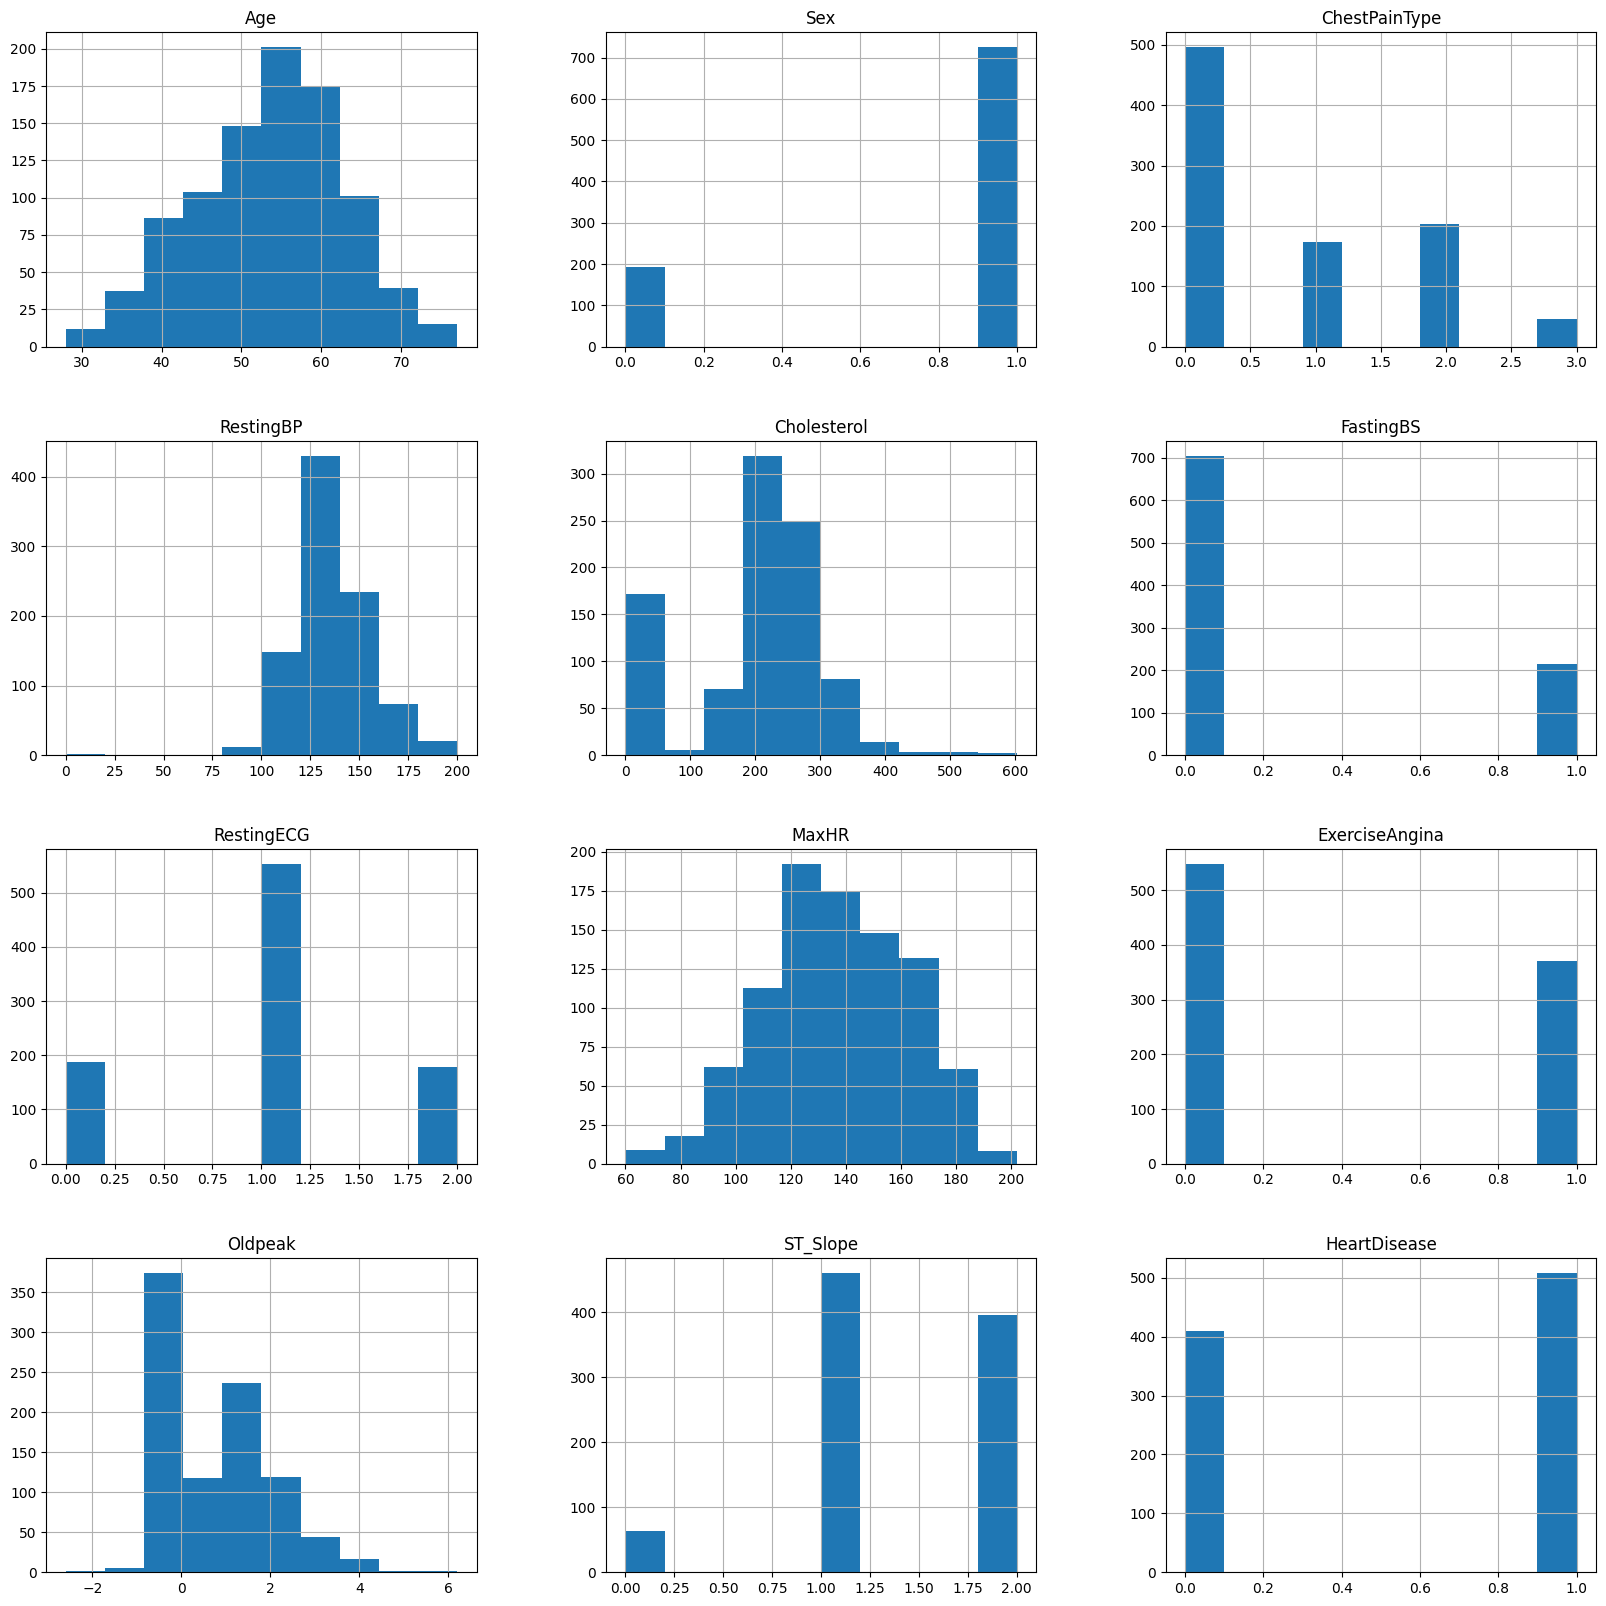

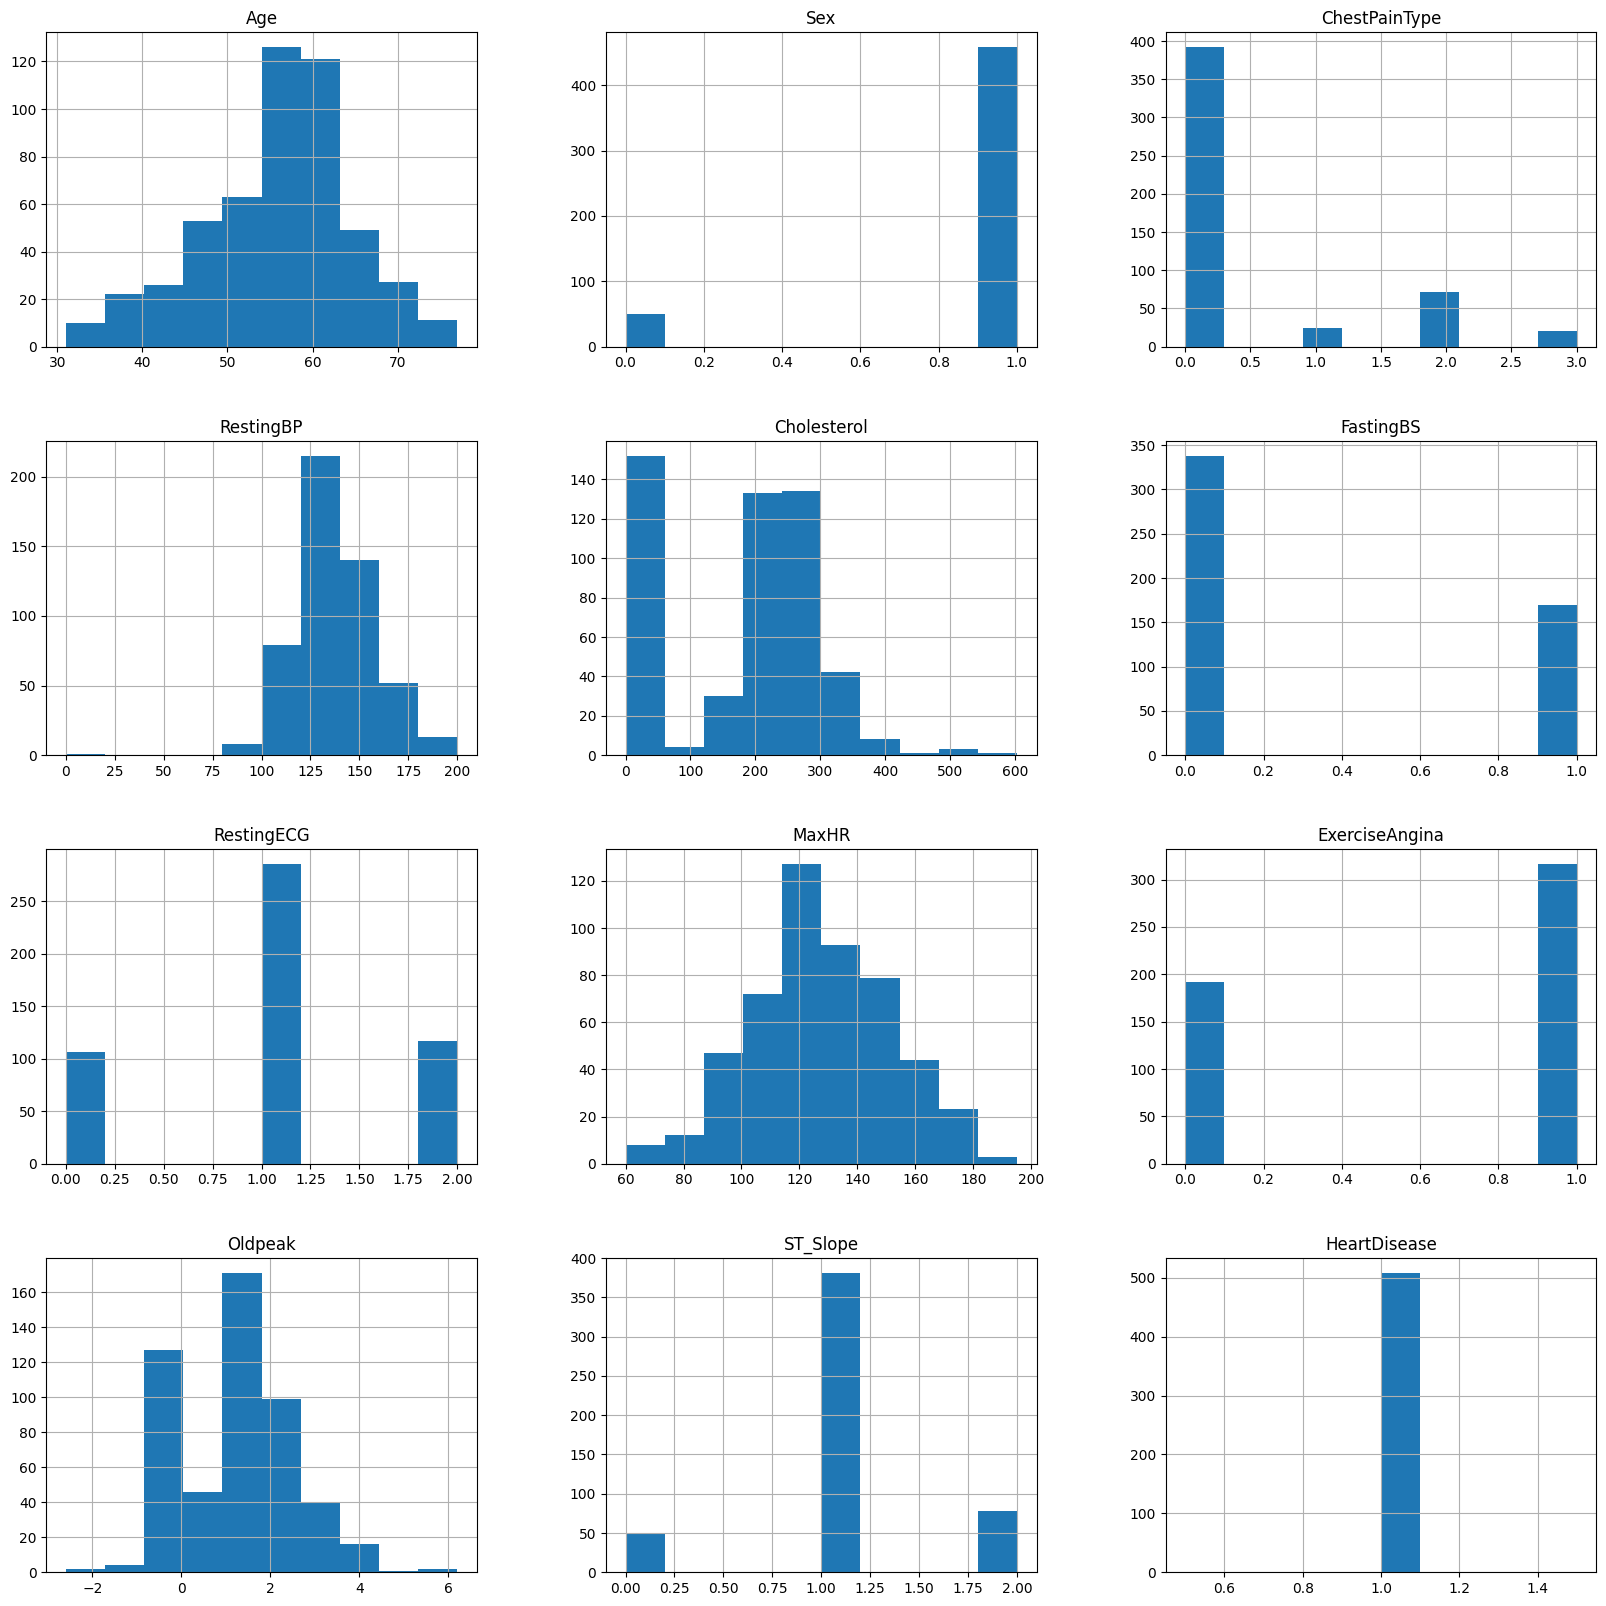

In [145]:
df.hist(figsize=(20,20)),df1.hist(figsize=(20,20))

In [125]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [126]:
df.shape

(918, 12)

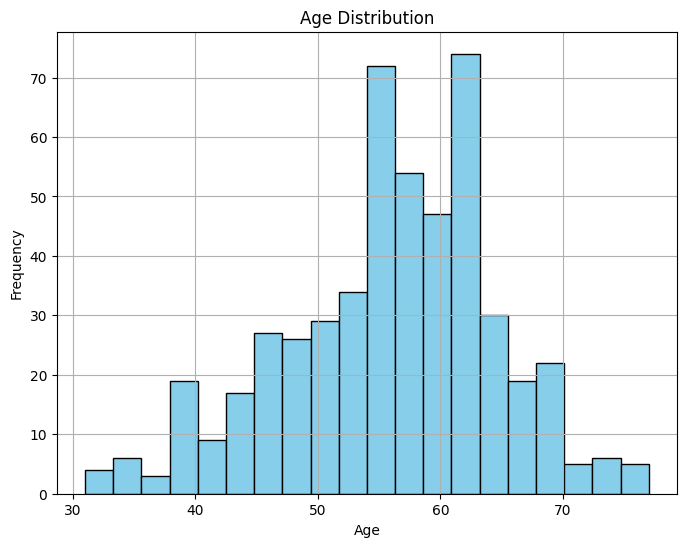

In [146]:
plt.figure(figsize=(8, 6))
plt.hist(df1['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

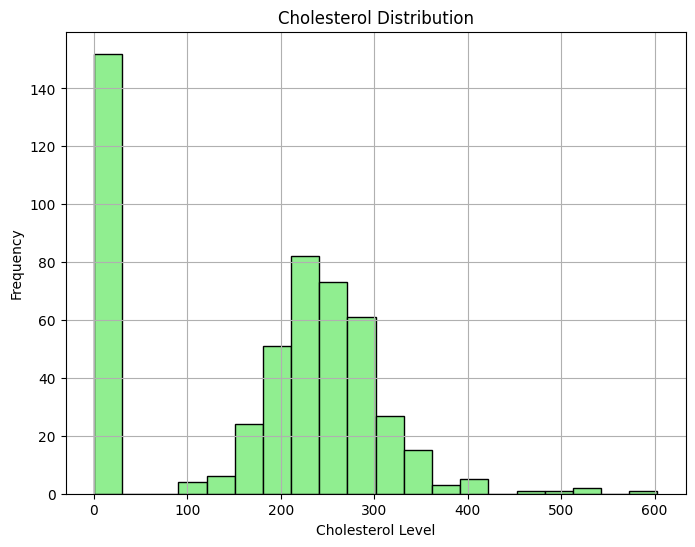

In [147]:
plt.figure(figsize=(8, 6))
plt.hist(df1['Cholesterol'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

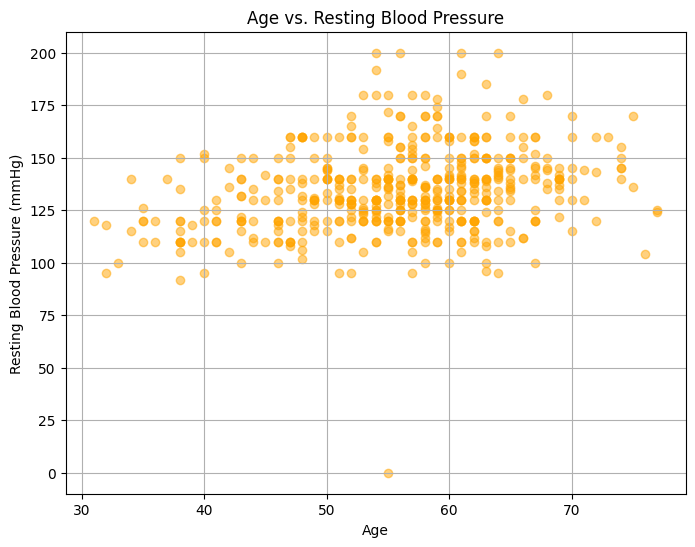

In [148]:
plt.figure(figsize=(8, 6))
plt.scatter(df1['Age'], df1['RestingBP'], color='orange', alpha=0.5)
plt.title('Age vs. Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure (mmHg)')
plt.grid(True)
plt.show()

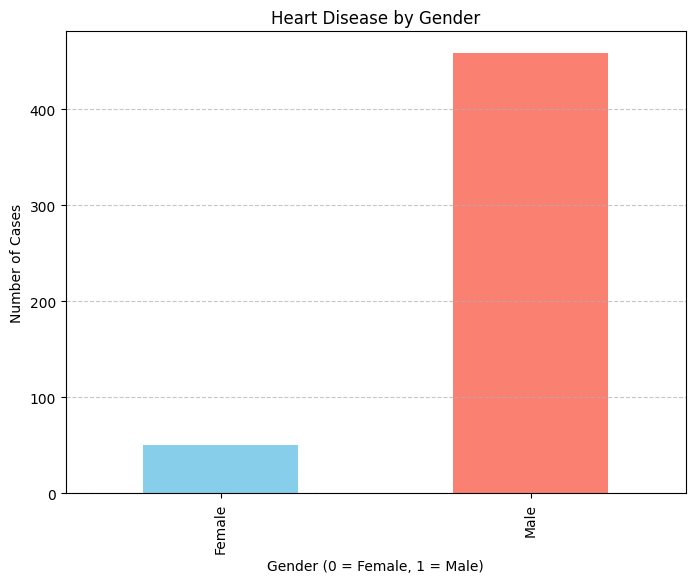

(Sex
 0     50
 1    458
 Name: HeartDisease, dtype: int64,
 (508, 12))

In [151]:
heart_disease_by_gender = df1.groupby('Sex')['HeartDisease'].sum()


plt.figure(figsize=(8, 6))
heart_disease_by_gender.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Heart Disease by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Number of Cases')
plt.xticks([0, 1], ['Female', 'Male'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
heart_disease_by_gender,df1.shape

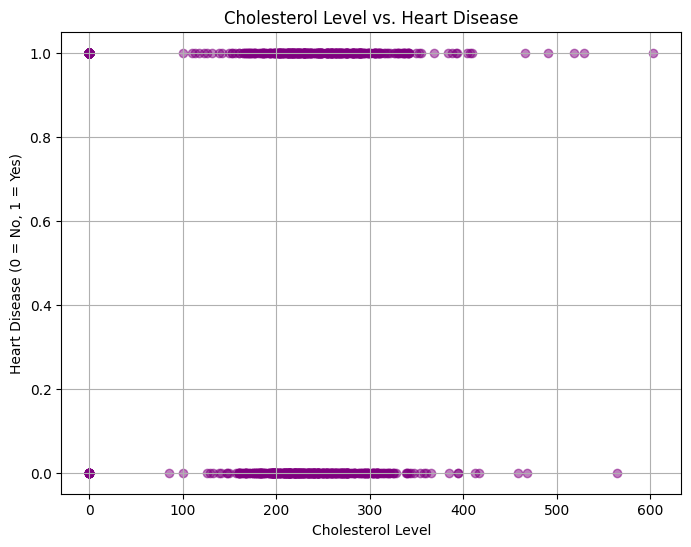

In [153]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Cholesterol'], df['HeartDisease'], color='purple', alpha=0.5)
plt.title('Cholesterol Level vs. Heart Disease')
plt.xlabel('Cholesterol Level')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()

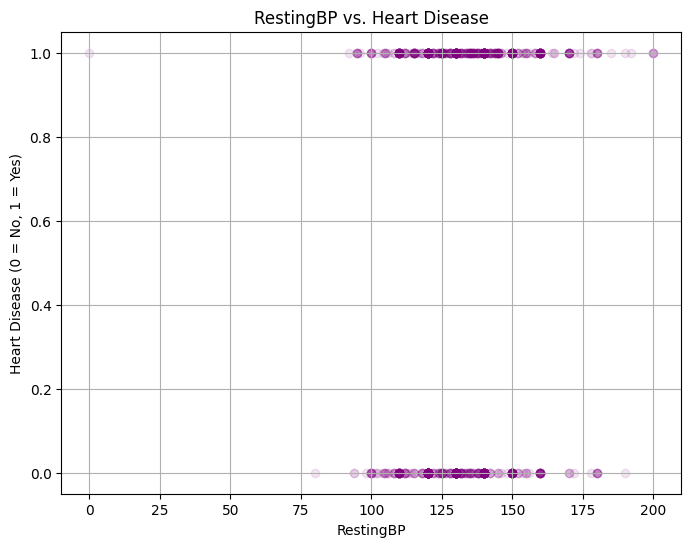

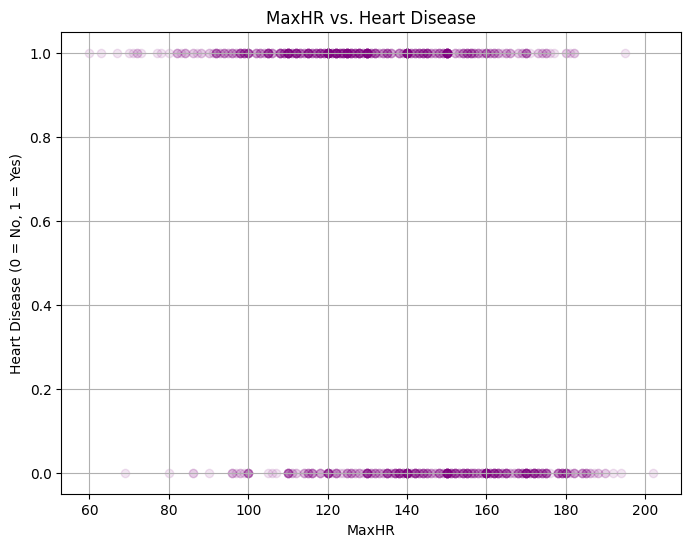

In [159]:
plt.figure(figsize=(8, 6))
plt.scatter(df['RestingBP'], df['HeartDisease'], color='purple', alpha=0.1)
plt.title('RestingBP vs. Heart Disease')
plt.xlabel('RestingBP')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['MaxHR'], df['HeartDisease'], color='purple', alpha=0.1)
plt.title('MaxHR vs. Heart Disease')
plt.xlabel('MaxHR')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()

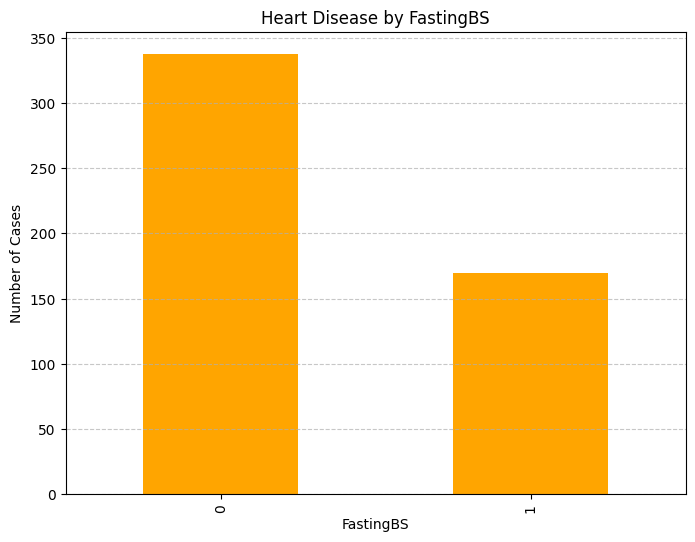

FastingBS
0    338
1    170
Name: HeartDisease, dtype: int64

In [155]:


heart_disease_by_FastingBS = df1.groupby('FastingBS')['HeartDisease'].sum()


plt.figure(figsize=(8, 6))
heart_disease_by_FastingBS.plot(kind='bar', color='orange')
plt.title('Heart Disease by FastingBS')
plt.xlabel('FastingBS')
plt.ylabel('Number of Cases')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
heart_disease_by_FastingBS

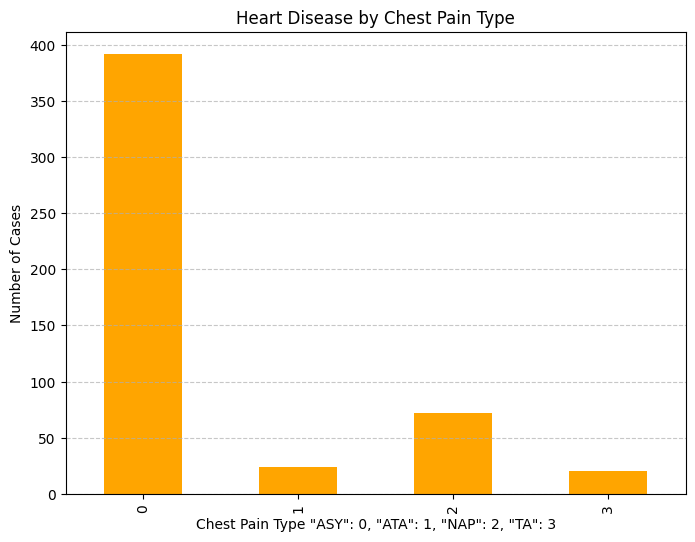

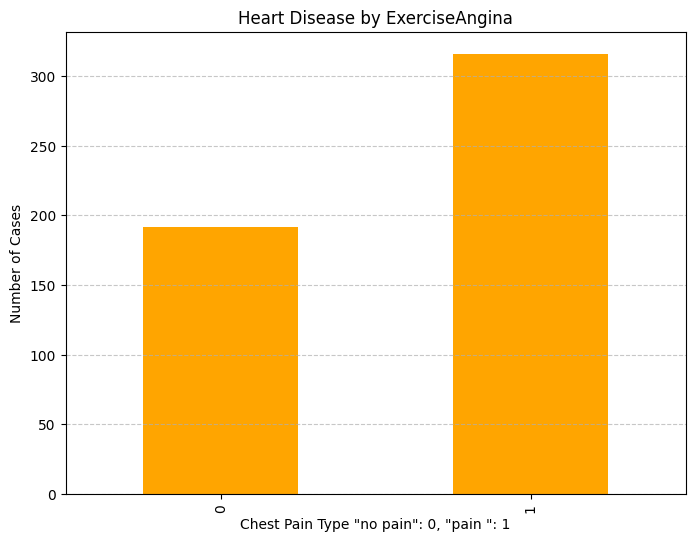

In [162]:
heart_disease_by_chest_pain = df1.groupby('ChestPainType')['HeartDisease'].sum()


plt.figure(figsize=(8, 6))
heart_disease_by_chest_pain.plot(kind='bar', color='orange')
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type "ASY": 0, "ATA": 1, "NAP": 2, "TA": 3')
plt.ylabel('Number of Cases')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

heart_disease_by_ExerciseAngina = df1.groupby('ExerciseAngina')['HeartDisease'].sum()


plt.figure(figsize=(8, 6))
heart_disease_by_ExerciseAngina.plot(kind='bar', color='orange')
plt.title('Heart Disease by ExerciseAngina')
plt.xlabel('Chest Pain Type "no pain": 0, "pain ": 1')
plt.ylabel('Number of Cases')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

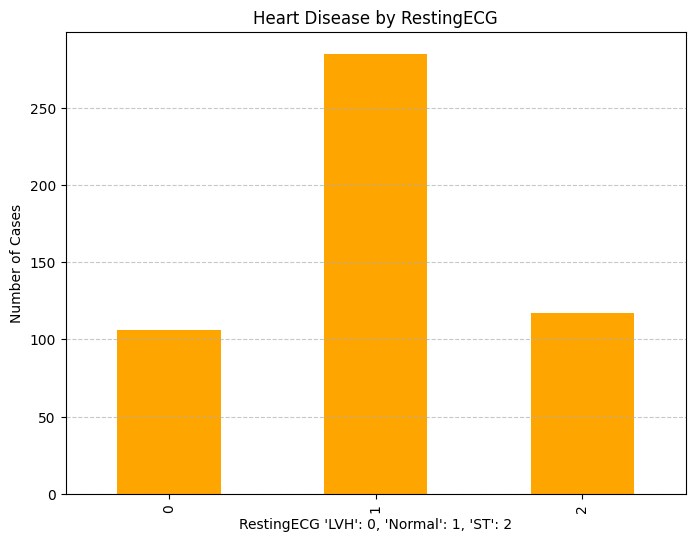

RestingECG
0    106
1    285
2    117
Name: HeartDisease, dtype: int64

In [163]:
heart_disease_by_RestingECG = df1.groupby('RestingECG')['HeartDisease'].sum()


plt.figure(figsize=(8, 6))
heart_disease_by_RestingECG.plot(kind='bar', color='orange')
plt.title('Heart Disease by RestingECG')
plt.xlabel('RestingECG \'LVH\': 0, \'Normal\': 1, \'ST\': 2')
plt.ylabel('Number of Cases')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
heart_disease_by_RestingECG

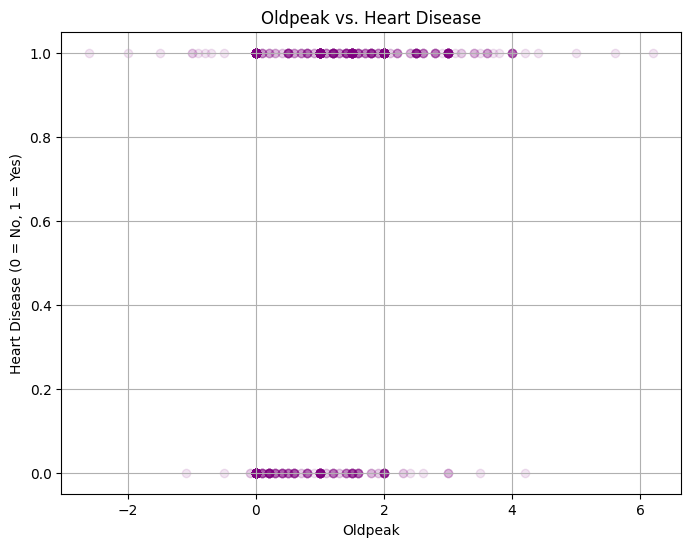

Oldpeak
-2.6      1
-2.0      1
-1.5      1
-1.1      0
-1.0      2
-0.9      1
-0.8      1
-0.7      1
-0.5      1
-0.1      0
 0.0    124
 0.1      5
 0.2      4
 0.3      3
 0.4      2
 0.5     12
 0.6      4
 0.7      5
 0.8      8
 0.9      3
 1.0     60
 1.1      5
 1.2     19
 1.3      5
 1.4     12
 1.5     42
 1.6      8
 1.7      6
 1.8     14
 1.9      5
 2.0     62
 2.1      2
 2.2      5
 2.3      0
 2.4      3
 2.5     16
 2.6      6
 2.8      7
 2.9      1
 3.0     25
 3.1      1
 3.2      2
 3.4      3
 3.5      1
 3.6      4
 3.7      1
 3.8      1
 4.0      8
 4.2      1
 4.4      1
 5.0      1
 5.6      1
 6.2      1
Name: HeartDisease, dtype: int64

In [167]:
heart_disease_by_Oldpeak = df.groupby('Oldpeak')['HeartDisease'].sum()


plt.figure(figsize=(8, 6))
plt.scatter(df['Oldpeak'], df['HeartDisease'], color='purple', alpha=0.1)
plt.title('Oldpeak vs. Heart Disease')
plt.xlabel('Oldpeak')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()

heart_disease_by_Oldpeak

In [161]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


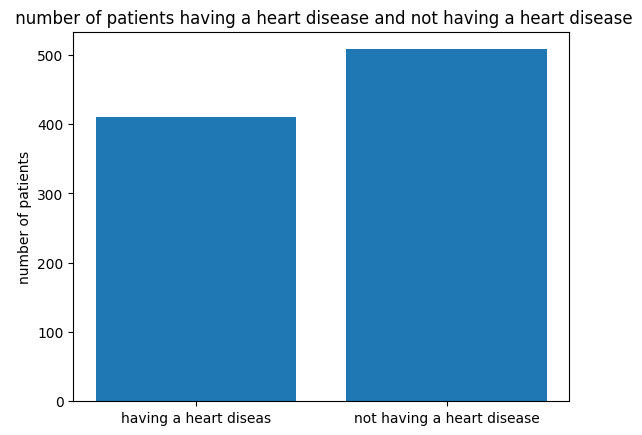

In [136]:

x = df['HeartDisease'].value_counts().keys().tolist()
y = df['HeartDisease'].value_counts().tolist()
labels = ['having a heart diseas','not having a heart disease']
plt.bar(x,y)
plt.title(' number of patients having a heart disease and not having a heart disease')
plt.ylabel('number of patients')
plt.xticks(range(2),labels)
plt.show()

'dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,fig_size=(50,50))\nplt.show'

In [137]:
list=df.columns.to_list()
list.remove('HeartDisease')
list

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope']

In [37]:

x=df[list]
y = pd.DataFrame(df['HeartDisease'])
from sklearn.model_selection import train_test_split
x_tr,x_test,y_tr,y_test = train_test_split(x,y,shuffle=True,random_state=7,test_size=0.3)
from sklearn.linear_model import LogisticRegression
slr = LogisticRegression()
slr.fit(x_tr,y_tr)
y_pred = slr.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix
accuracy_slr=accuracy_score(y_pred, y_test)*100
matrix_slr=confusion_matrix(y_test, y_pred)
precision_slr=precision_score(y_test, y_pred)
recall_slr=recall_score(y_test, y_pred)
f1_slr=f1_score(y_test, y_pred)


In [40]:

x=df[list]
y = pd.DataFrame(df['HeartDisease'])
from sklearn.model_selection import train_test_split
x_tr,x_test,y_tr,y_test = train_test_split(x,y,shuffle=True,random_state=7,test_size=0.3)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_tr,y_tr)
y_pred = dt.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
accuracy_dt=accuracy_score(y_pred, y_test)*100
matrix_dt=confusion_matrix(y_test, y_pred)
precision_dt=precision_score(y_test, y_pred)
recall_dt=recall_score(y_test, y_pred)
f1_dt=f1_score(y_test, y_pred)


[Text(0.48459141274238227, 0.9615384615384616, 'ST_Slope <= 1.5\ngini = 0.493\nsamples = 642\nvalue = [282, 360]'),
 Text(0.235803324099723, 0.8846153846153846, 'ChestPainType <= 0.5\ngini = 0.288\nsamples = 367\nvalue = [64, 303]'),
 Text(0.10249307479224377, 0.8076923076923077, 'Sex <= 0.5\ngini = 0.156\nsamples = 258\nvalue = [22, 236]'),
 Text(0.07202216066481995, 0.7307692307692307, 'Oldpeak <= 1.3\ngini = 0.389\nsamples = 34\nvalue = [9, 25]'),
 Text(0.0443213296398892, 0.6538461538461539, 'RestingECG <= 0.5\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.0221606648199446, 0.5769230769230769, 'RestingBP <= 142.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.0110803324099723, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.0332409972299169, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0664819944598338, 0.5769230769230769, 'MaxHR <= 135.5\ngini = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(0.055401662049861494, 0.5, 'MaxHR <= 124.5\ngini = 0.5\

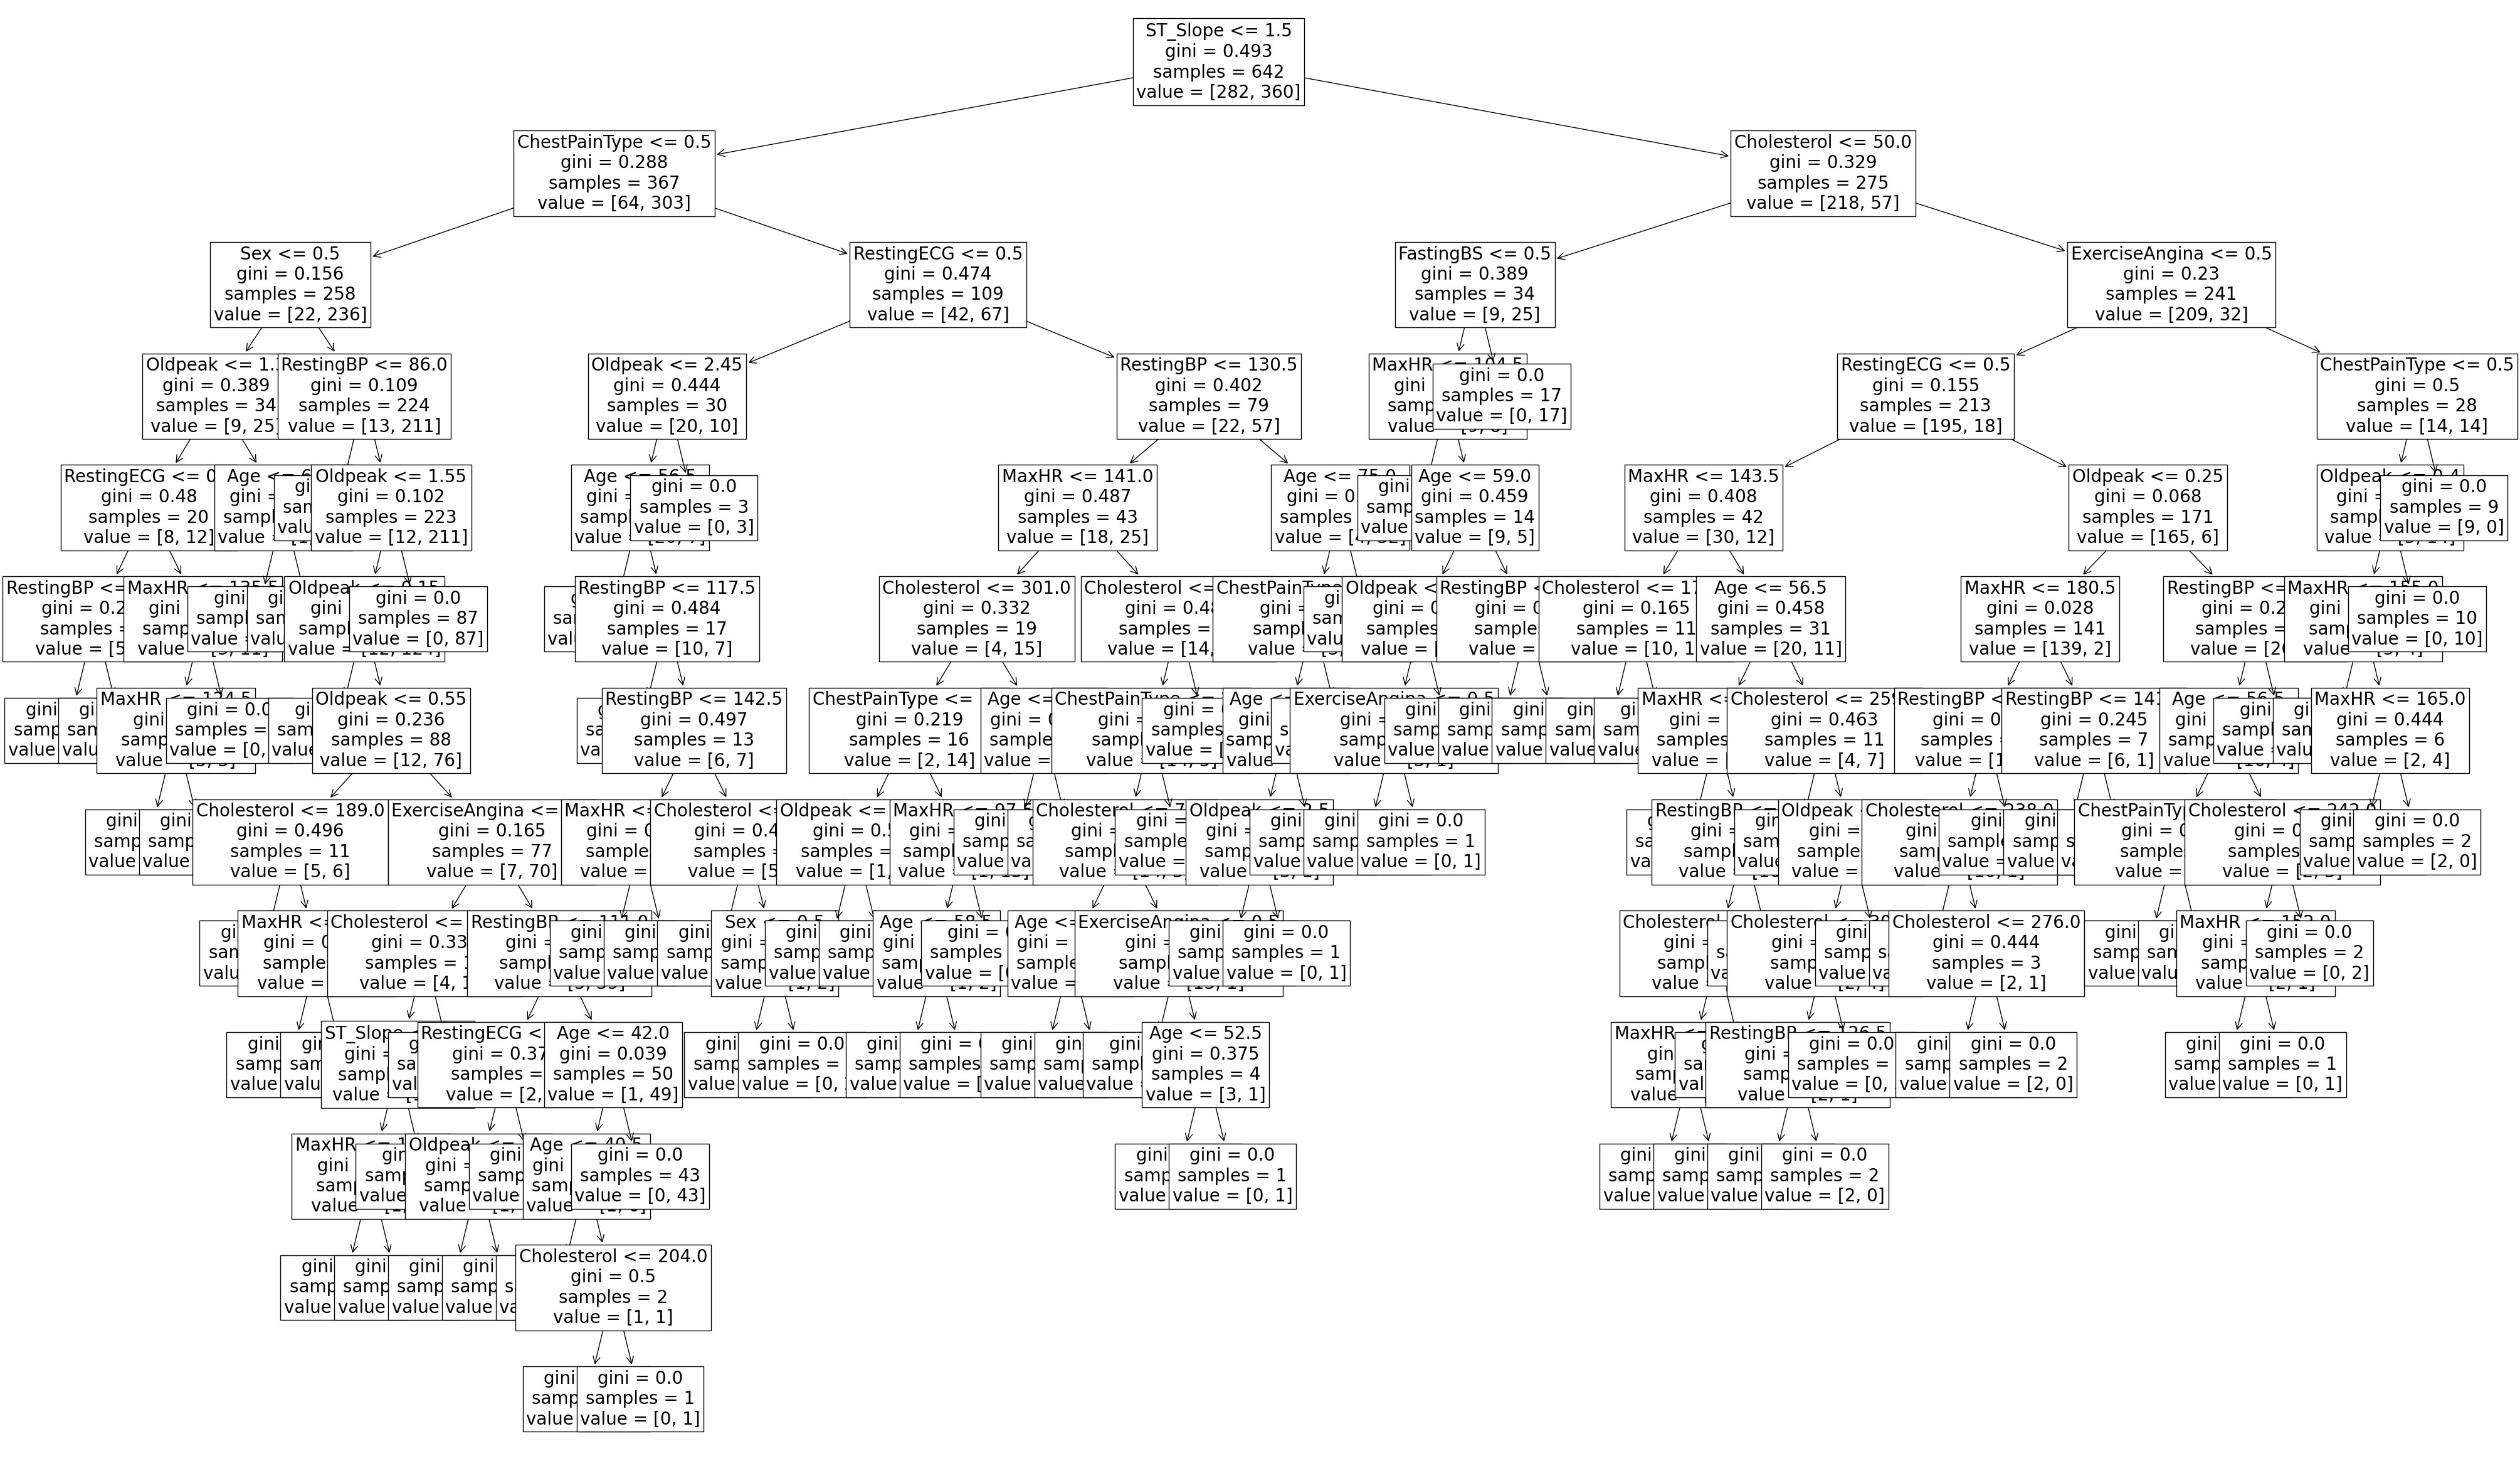

In [43]:
plt.figure(figsize=(50,30))
tree.plot_tree(dt,fontsize=20, feature_names = list)

In [44]:

x=df[list]
y = pd.DataFrame(df['HeartDisease'])
from sklearn.model_selection import train_test_split
x_tr,x_test,y_tr,y_test = train_test_split(x,y,shuffle=True,random_state=7,test_size=0.3)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50)
rf.fit(x_tr,y_tr)
y_pred = rf.predict(x_test)
y_pred

<ipython-input-44-e1dfaac19dff>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr,y_tr)


array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0])

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
accuracy_rf=accuracy_score(y_pred, y_test)*100
matrix_rf=confusion_matrix(y_test, y_pred)
precision_rf=precision_score(y_test, y_pred)
recall_rf=recall_score(y_test, y_pred)
f1_rf=f1_score(y_test, y_pred)


[Text(0.49321227080394925, 0.9642857142857143, 'Oldpeak <= 0.65\ngini = 0.494\nsamples = 413\nvalue = [287, 355]'),
 Text(0.29777856135401976, 0.8928571428571429, 'FastingBS <= 0.5\ngini = 0.454\nsamples = 213\nvalue = [219, 117]'),
 Text(0.18229901269393511, 0.8214285714285714, 'Cholesterol <= 156.5\ngini = 0.419\nsamples = 180\nvalue = [200, 85]'),
 Text(0.06770098730606489, 0.75, 'Sex <= 0.5\ngini = 0.42\nsamples = 25\nvalue = [12, 28]'),
 Text(0.03385049365303244, 0.6785714285714286, 'ST_Slope <= 1.5\ngini = 0.32\nsamples = 3\nvalue = [4, 1]'),
 Text(0.022566995768688293, 0.6071428571428571, 'ChestPainType <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.011283497884344146, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03385049365303244, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.045133991537376586, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [3, 0]'),
 Text(0.10155148095909731, 0.6785714285714286, 'MaxHR <=

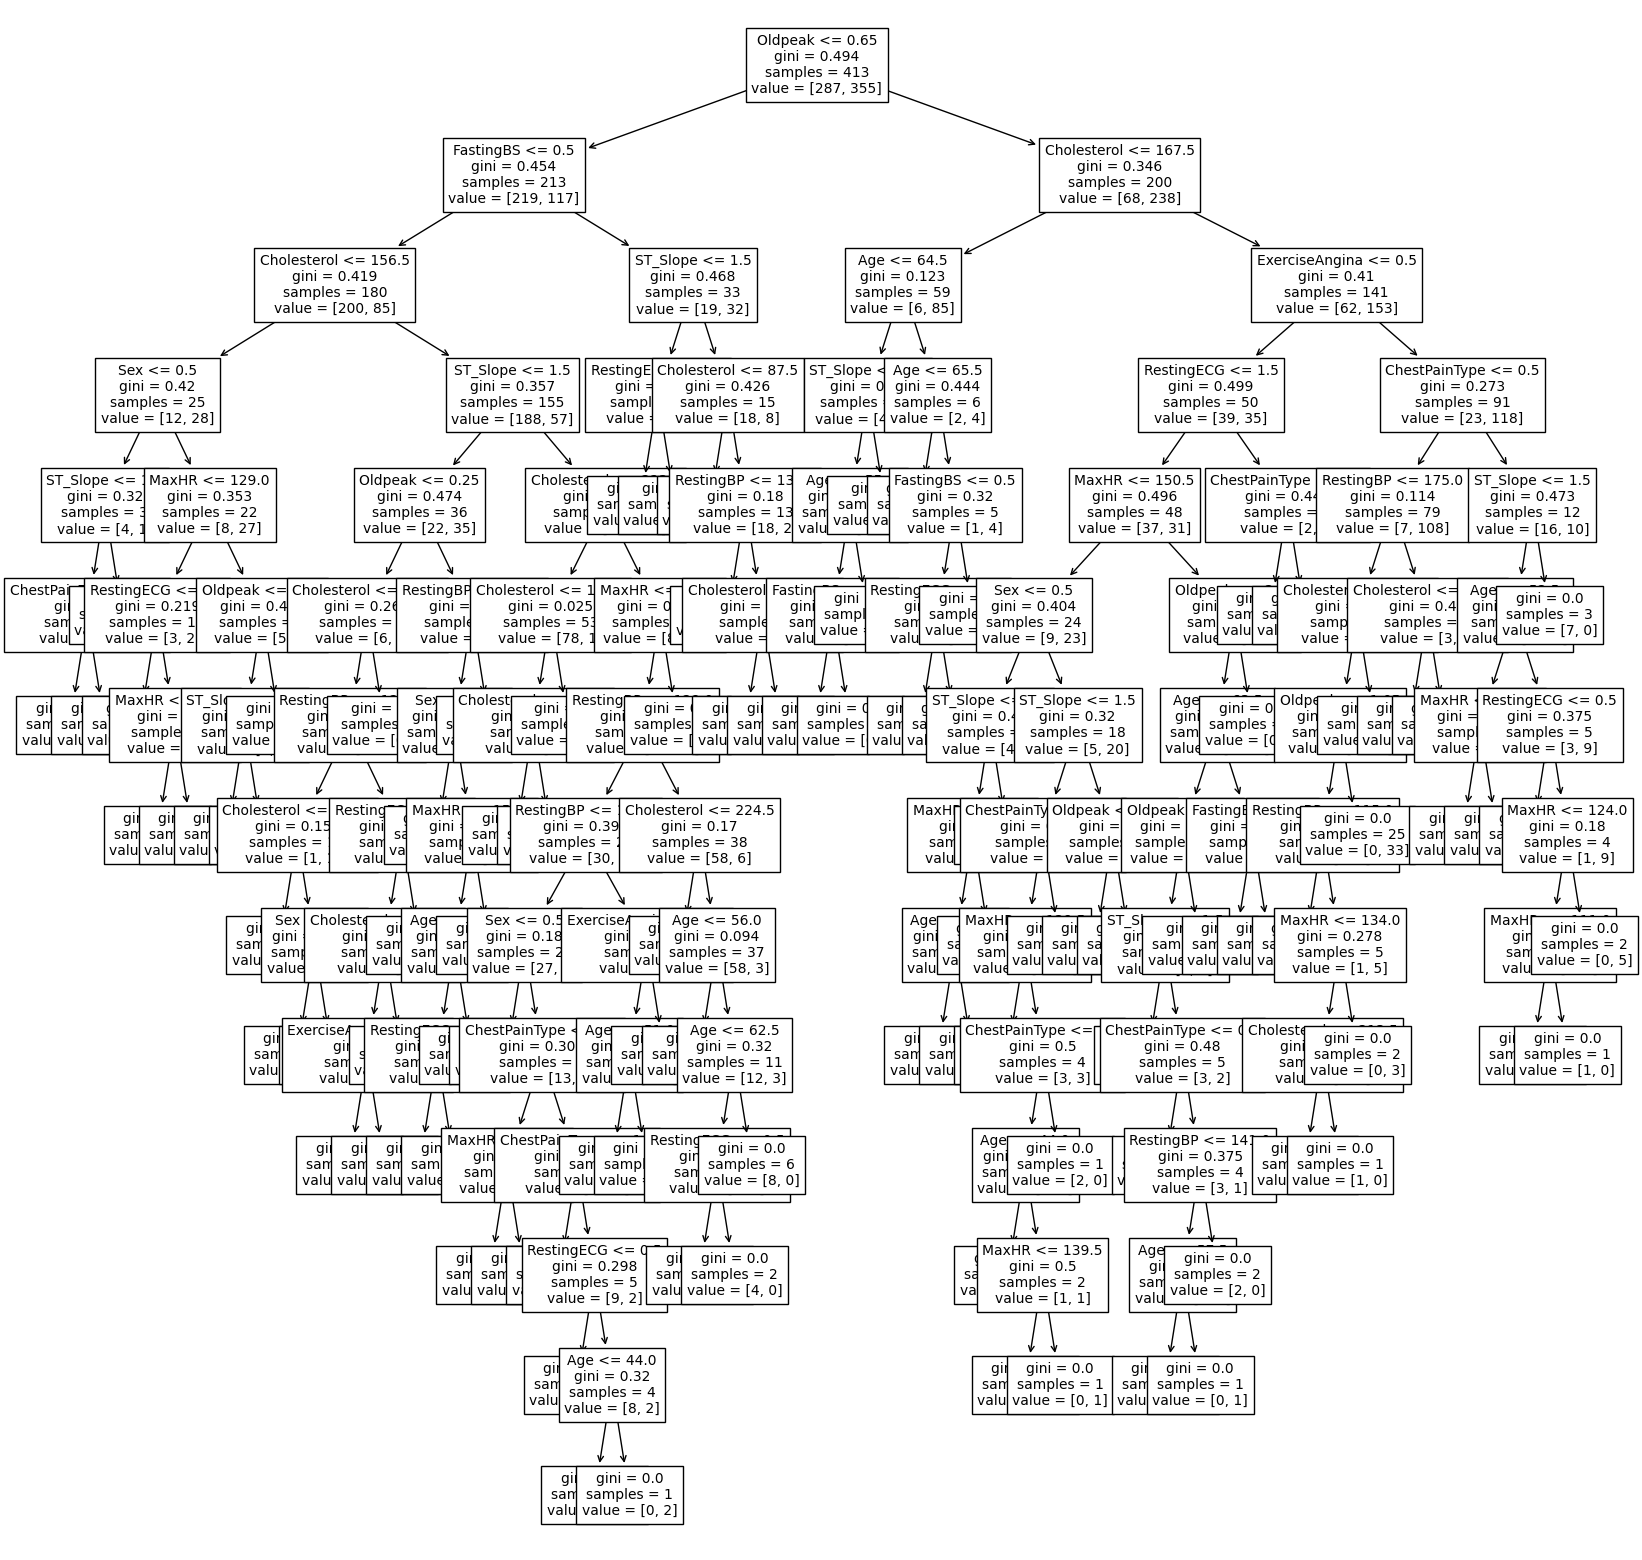

In [46]:
DT_45 = rf.estimators_[45]
plt.figure(figsize=(20,20))
tree.plot_tree(DT_45,fontsize=10, feature_names =list)

In [47]:

print(f'confusion matrix of Logistic Regression:\n{matrix_slr}\n\nconfusion matrix of Decision Tree:\n{matrix_dt}\n\nconfusion matrix of Random Forest:\n{matrix_rf}')

confusion matrix of Logistic Regression:
[[105  23]
 [ 13 135]]

confusion matrix of Decision Tree:
[[101  27]
 [ 24 124]]

confusion matrix of Random Forest:
[[107  21]
 [ 15 133]]


In [48]:
print(f'Recall Score of Logistic Regression:{recall_slr*100}\nRecall Score of Decision Tree:{recall_dt*100}\nRecall Score of Random Forest:{recall_rf*100}')
print(f'\n\nprecision Score of Logistic Regression:{precision_slr*100}\nprecision f1Score of Decision Tree:{precision_dt*100}\nprecision Score of Random Forest:{precision_rf*100}')
print(f'\n\nf1 Score of Logistic Regression:{f1_slr*100}\nf1 Score of Decision Tree:{f1_dt*100}\nf1 Score of Random Forest:{f1_rf*100}')

Recall Score of Logistic Regression:91.21621621621621
Recall Score of Decision Tree:83.78378378378379
Recall Score of Random Forest:89.86486486486487


precision Score of Logistic Regression:85.44303797468355
precision f1Score of Decision Tree:82.11920529801324
precision Score of Random Forest:86.36363636363636


f1 Score of Logistic Regression:88.23529411764706
f1 Score of Decision Tree:82.94314381270902
f1 Score of Random Forest:88.0794701986755


Text(0.5, 1.0, 'Logistic Regression')

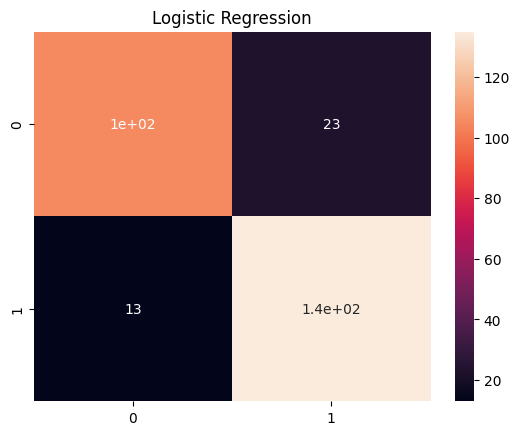

In [49]:
import seaborn as sns
sns.heatmap(matrix_slr, annot=True)
plt.title('Logistic Regression')


Text(0.5, 1.0, 'Decision Tree')

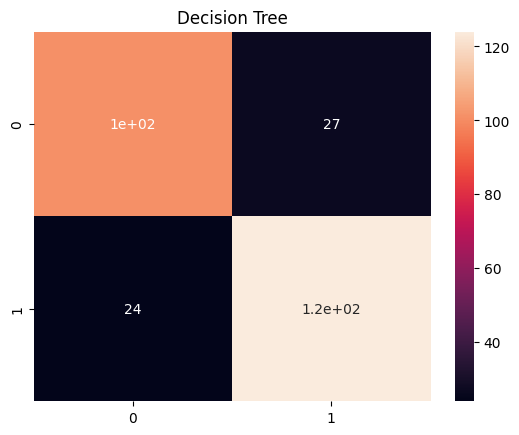

In [50]:
import seaborn as sns
sns.heatmap(matrix_dt, annot=True)
plt.title('Decision Tree')

Text(0.5, 1.0, 'Random Forest')

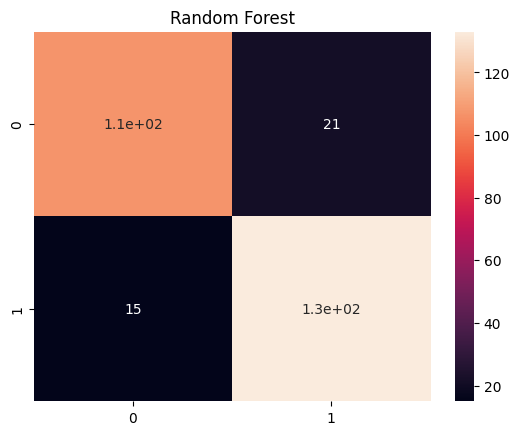

In [51]:
import seaborn as sns
sns.heatmap(matrix_rf, annot=True)
plt.title('Random Forest')

In [52]:
print(f'accuracy score of Logistic Regression:\n{accuracy_slr}\n\naccuracy score of Decision Tree:\n{accuracy_dt}\n\naccuracy score of Random Forest:\n{accuracy_rf}')

accuracy score of Logistic Regression:
86.95652173913044

accuracy score of Decision Tree:
81.52173913043478

accuracy score of Random Forest:
86.95652173913044
